In [1]:
%load_ext autoreload
%autoreload 2

### Virtual Screening with a pharmacophore fingerprint

In [2]:
from openpharmacophore.screening.screening2D import VirtualScreening2D
import time

from rdkit import Chem, RDLogger
RDLogger.DisableLog('rdApp.*')

## Scan a list of Molecules

In [4]:
mols = ['Cc1cccc(c2n[nH]cc2c3ccc4ncccc4n3)n1',
      'Cc1cccnc1c2nc(N)sc2c3nc4cccnc4cc3',
      'Cc1cccc(c2[nH]c(CNc5cc(C(=O)N)ccc5)nc2c3ccc4nccnc4c3)n1',
      'Clc1cccc(c2nc(N)sc2c3ccc4ncccc4n3)c1',
      'n1ccccc1c2nn3CCCc3c2c4ccnc5cc(NC(=O)NCCN(C)C)ccc45']

mols = [Chem.MolFromSmiles(mol) for mol in mols]

query_mol = mols[0]
screener = VirtualScreening2D(query_mol)
screener.screen_mol_list(mols)

In [5]:
print("Number of molecules scaned: {}".format(screener.n_molecules))
print("Number of molecules aligned to pharmacophore: {}".format(screener.n_matches))
print("Number of molecules that didn't match the pharmacophore: {}".format(screener.n_fails))
print(screener.matches)

Number of molecules scaned: 5
Number of molecules aligned to pharmacophore: 1
Number of molecules that didn't match the pharmacophore: 4
[(1.0, None, <rdkit.Chem.rdchem.Mol object at 0x7f70c0308b20>)]


## Scan a file

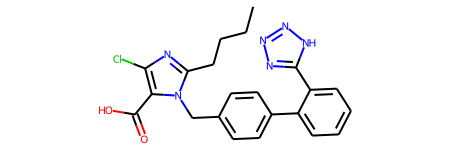

In [3]:
molecule = Chem.MolFromSmiles("CCCCc1nc(Cl)c(C(=O)O)n1Cc4ccc(c2ccccc2c3nnn[nH]3)cc4")
molecule

In [4]:
# Scan a file
file_path = "../../data/Databases/zinc/AAAA.smi"
screener_2d = VirtualScreening2D(molecule, "tanimoto", 0.8)
screener_2d.screen_db_from_dir(file_path)

File scanned!


In [5]:
screener_2d.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                                4,166
Molecules matched to pharmacophore:                   0
Molecules that didn't match the pharmacophore:    4,166


In [9]:
# Scan a directory
file_path = "../../data/Databases/Chembl/"
screener_2d = VirtualScreening2D(molecule, "tanimoto", 0.5)
screener_2d.screen_db_from_dir(file_path)

  0%|          | 0/7 [00:00<?, ?it/s]

(0.6600331674958541, 'CHEMBL49170', <rdkit.Chem.rdchem.Mol object at 0x7f99b2e30030>)
(0.7021630615640599, 'CHEMBL51399', <rdkit.Chem.rdchem.Mol object at 0x7f99b2c76b20>)
(0.5229226361031518, 'CHEMBL298950', <rdkit.Chem.rdchem.Mol object at 0x7f99b2c6da80>)
(0.5443708609271524, 'CHEMBL298632', <rdkit.Chem.rdchem.Mol object at 0x7f99b2c71a30>)
(0.5386666666666666, 'CHEMBL300882', <rdkit.Chem.rdchem.Mol object at 0x7f99b2c75300>)
(0.547945205479452, 'CHEMBL299809', <rdkit.Chem.rdchem.Mol object at 0x7f99b2d18bc0>)
(0.8974358974358975, 'CHEMBL907', <rdkit.Chem.rdchem.Mol object at 0x7f99b2d18df0>)
(0.5420875420875421, 'CHEMBL22001', <rdkit.Chem.rdchem.Mol object at 0x7f99b2fa7670>)
(0.7165354330708661, 'CHEMBL283975', <rdkit.Chem.rdchem.Mol object at 0x7f99b2d48bc0>)
(0.6964809384164223, 'CHEMBL281386', <rdkit.Chem.rdchem.Mol object at 0x7f99b2d49df0>)
(0.5598705501618123, 'CHEMBL430339', <rdkit.Chem.rdchem.Mol object at 0x7f99b2d4a0d0>)
(0.5969529085872576, 'CHEMBL430535', <rdkit.Chem.r

In [26]:
screener_2d.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                               60,427
Molecules matched to pharmacophore:                  39
Molecules that didn't match the pharmacophore:   60,388
Lowest  Similarity value:     0.5021
Highest Similarity value:     0.8974
Average Similarity value:     0.6104

Top 5 molecules:

   ID     Similarity
-------       ------
CHEMBL907     0.8974
CHEMBL431887  0.7883
CHEMBL22796   0.7883
CHEMBL21946   0.7883
CHEMBL21713   0.7883



In [24]:
screener_2d.similar_mols[0:3]

[(0.5020804438280166,
  'CHEMBL43500',
  <rdkit.Chem.rdchem.Mol at 0x7f99b2d4e3a0>),
 (0.5085271317829457,
  'CHEMBL285127',
  <rdkit.Chem.rdchem.Mol at 0x7f99b2f50e40>),
 (0.5126903553299492,
  'CHEMBL26321',
  <rdkit.Chem.rdchem.Mol at 0x7f99b2e32850>)]

## Scan subset of ZINC

In [27]:
zinc_screener = VirtualScreening2D(molecule, "tanimoto", 0.6)
zinc_screener.screen_db(db="zinc",
                        download_dir=None,
                        subset=None, 
                        mw_range=(250,300), 
                        logp_range=(1,2))

  0%|          | 0/31 [00:00<?, ?it/s]

Processing files...


  0%|          | 0/32 [00:00<?, ?it/s]

Finished screening ZINC database


In [24]:
zinc_screener.print_report()

Virtual Screening Results
-------------------------

Molecules scanned:                              516,224
Molecules matched to pharmacophore:                   0
Molecules that didn't match the pharmacophore: 7,860,708
